In [1]:
import seaborn as sns
import numpy as np
import math

In [2]:
def gva_exp(): #generador de valor aleatorio
    _lambda = 0.00157
    U = np.random.rand()
    return -1 *(math.log(1-U)/_lambda)

In [3]:
#Num aleatorio
def U():
    return np.random.randint(1,5)

In [4]:
K=50

In [5]:
matrix = np.zeros((K,5))

In [6]:
x = gva_exp() 

In [7]:
tiempo_llegada = 0
tiempo_en_sistema = 0
for i in range(K):
    t_entre_usuario = gva_exp()  #Tiempo para cada usuario
    tiempo_llegada = tiempo_llegada + t_entre_usuario #Tiempo haciendo cola
    tiempo_inicio_servicio = tiempo_llegada + U() #Tiempo para llegar hacia la persona q la va atender
    tiempo_servicio = tiempo_inicio_servicio + np.random.poisson(5)  #Tiempo en atender a la persona
    tiempo_en_sistema = tiempo_en_sistema + (tiempo_servicio - tiempo_inicio_servicio) #Tiempo q termino el servicio en todo el sistema en atender a todas las personas (no es tiempo_fin_servicio)
    
    matrix[i,0] = t_entre_usuario
    matrix[i,1] = tiempo_llegada
    matrix[i,2] = tiempo_inicio_servicio
    matrix[i,3] = tiempo_servicio
    matrix[i,4] = tiempo_en_sistema
    
    
    print("TEU %s ,T_LLeg %s,T_Inic_S  %s, T_Serv %s, T_Sistema %s" %(t_entre_usuario,tiempo_llegada,tiempo_inicio_servicio,tiempo_servicio,tiempo_en_sistema))
   

TEU 38.844117380992465 ,T_LLeg 38.844117380992465,T_Inic_S  41.844117380992465, T_Serv 46.844117380992465, T_Sistema 5.0
TEU 435.44346995224225 ,T_LLeg 474.28758733323474,T_Inic_S  478.28758733323474, T_Serv 483.28758733323474, T_Sistema 10.0
TEU 541.8066427869504 ,T_LLeg 1016.0942301201851,T_Inic_S  1017.0942301201851, T_Serv 1021.0942301201851, T_Sistema 14.0
TEU 1718.2674604347762 ,T_LLeg 2734.3616905549616,T_Inic_S  2737.3616905549616, T_Serv 2740.3616905549616, T_Sistema 17.0
TEU 672.2584901097964 ,T_LLeg 3406.6201806647578,T_Inic_S  3410.6201806647578, T_Serv 3419.6201806647578, T_Sistema 26.0
TEU 205.01566789930374 ,T_LLeg 3611.6358485640617,T_Inic_S  3615.6358485640617, T_Serv 3622.6358485640617, T_Sistema 33.0
TEU 61.89074777902516 ,T_LLeg 3673.526596343087,T_Inic_S  3677.526596343087, T_Serv 3678.526596343087, T_Sistema 34.0
TEU 586.2502487875515 ,T_LLeg 4259.776845130638,T_Inic_S  4261.776845130638, T_Serv 4267.776845130638, T_Sistema 40.0
TEU 360.30883942639315 ,T_LLeg 4620

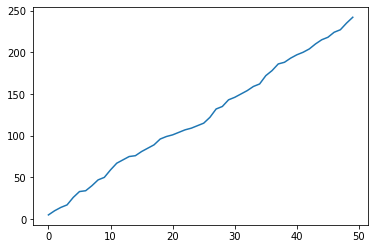

In [8]:
sns.lineplot(x=range(K), y= matrix[:,4]) #(tiempo_en_sistema)

In [9]:
matrix[:,4].mean()

122.28

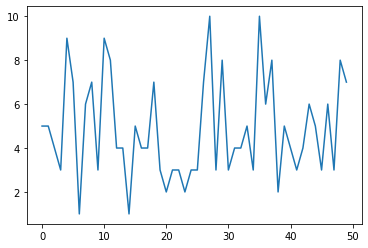

In [10]:
sns.lineplot(x=range(K), y= matrix[:,3] - matrix[:,2]) #(tiempo_en_sistema en cada persona)

In [11]:
T = matrix[:,3] - matrix[:,2]

In [12]:
T

array([ 5.,  5.,  4.,  3.,  9.,  7.,  1.,  6.,  7.,  3.,  9.,  8.,  4.,
        4.,  1.,  5.,  4.,  4.,  7.,  3.,  2.,  3.,  3.,  2.,  3.,  3.,
        7., 10.,  3.,  8.,  3.,  4.,  4.,  5.,  3., 10.,  6.,  8.,  2.,
        5.,  4.,  3.,  4.,  6.,  5.,  3.,  6.,  3.,  8.,  7.])

In [13]:
T.max()

10.0

In [14]:
T.min()

1.0

In [15]:
def freq_abs(X):
    _min = X.min()
    _max = X.max()
    m = np.zeros((int(_max)+1,4))
    
    for i in range(int(_min), int(_max)+1):
        c=0
        for j in range(K):
            if i == X[j]:
                c = c+1 
        #print("%s --> %s" %(i,c))     
        m[i,0] = i
        m[i,1] = c
    return m    

In [22]:
def freq_relativa(X):
    total = X[:,1].sum()
    _max = X[:,0].max()
    fr=0
    for i in range(10): #int(_max)+1
        fr = fr + X[i,1]
        X[i,2] = fr
        X[i,3] = X[i,2]/total
    return X    

In [17]:
T = freq_abs(T)

In [18]:
T

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  2.,  0.,  0.],
       [ 2.,  3.,  0.,  0.],
       [ 3., 13.,  0.,  0.],
       [ 4.,  9.,  0.,  0.],
       [ 5.,  6.,  0.,  0.],
       [ 6.,  4.,  0.,  0.],
       [ 7.,  5.,  0.,  0.],
       [ 8.,  4.,  0.,  0.],
       [ 9.,  2.,  0.,  0.],
       [10.,  2.,  0.,  0.]])

In [19]:
freq_relativa(T)

array([[0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+00, 2.0e+00, 2.0e+00, 4.0e-02],
       [2.0e+00, 3.0e+00, 5.0e+00, 1.0e-01],
       [3.0e+00, 1.3e+01, 1.8e+01, 3.6e-01],
       [4.0e+00, 9.0e+00, 2.7e+01, 5.4e-01],
       [5.0e+00, 6.0e+00, 3.3e+01, 6.6e-01],
       [6.0e+00, 4.0e+00, 3.7e+01, 7.4e-01],
       [7.0e+00, 5.0e+00, 4.2e+01, 8.4e-01],
       [8.0e+00, 4.0e+00, 4.6e+01, 9.2e-01],
       [9.0e+00, 2.0e+00, 4.8e+01, 9.6e-01],
       [1.0e+01, 2.0e+00, 0.0e+00, 0.0e+00]])

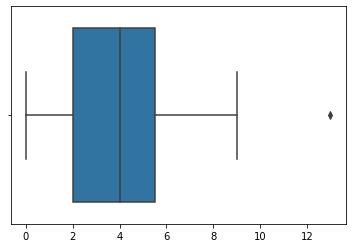

In [20]:
sns.boxplot(x=T[:,1]) #sns.boxplot(y=matrix[:,3]-matrix[:,2])

In [21]:
#